In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision.io import read_image
from PIL import Image
import matplotlib.pyplot as plt
import torch

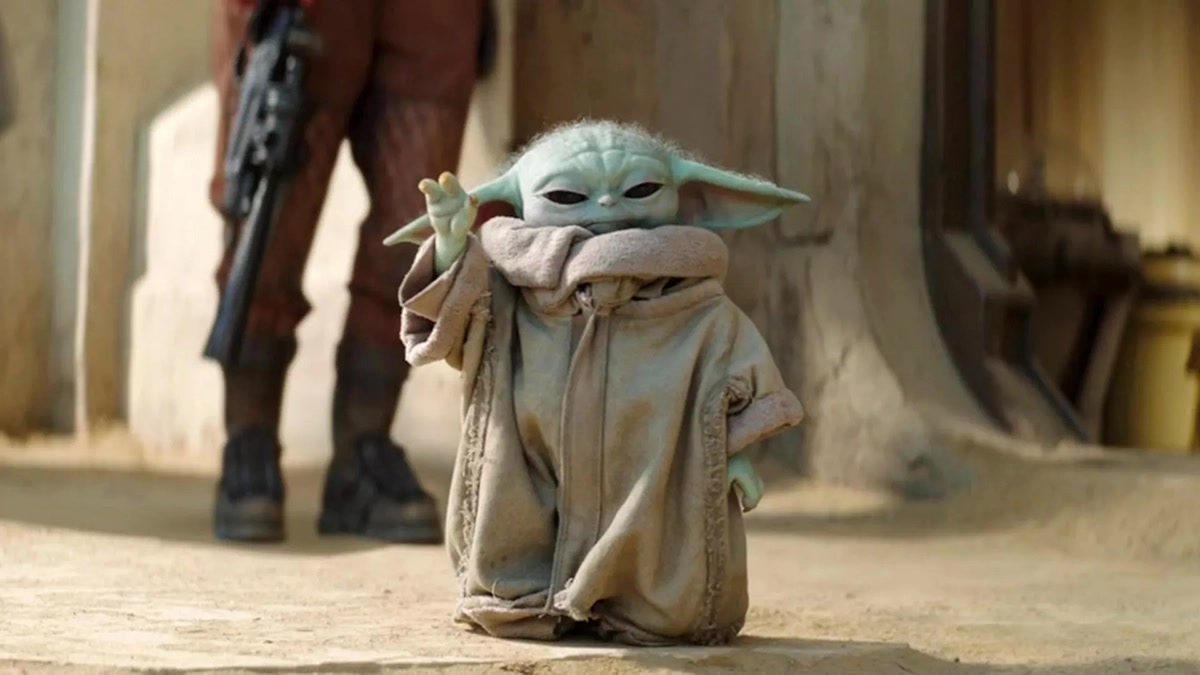

In [3]:
Image.open("grogu.jpg")

In [10]:
from src.data.type import ObjectDetectionData

image = read_image("grogu.jpg")
images = torch.stack([image, image.clone()], dim=0)
bboxes = torch.tensor([[[395, 140, 763, 633], [200, 100, 300, 300]], [[395, 140, 763, 633], [200, 100, 300, 300]]])
labels = torch.tensor([[[1],[2]], [[1],[2]]])
images_sizes = torch.tensor([image.shape[1:], image.shape[1:]])

data = ObjectDetectionData(images, bboxes, labels, images_sizes, batch_size=[images.shape[0]], device="cpu")
data.images_sizes

tensor([[ 675, 1200],
        [ 675, 1200]])

<IPython.core.display.Javascript object>


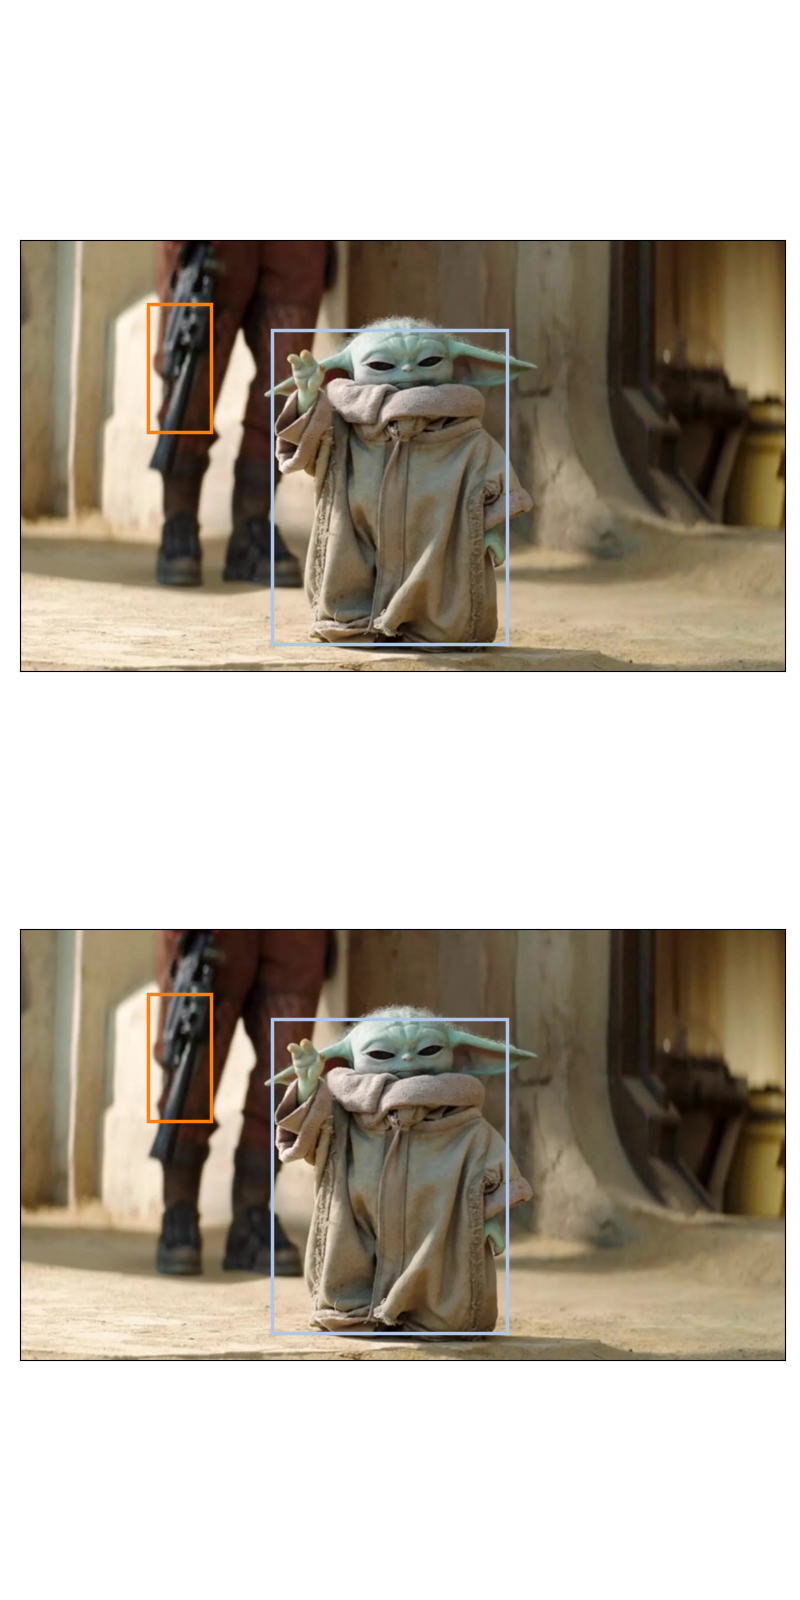

In [11]:
data.show()

In [49]:
import torch
from torch import Tensor
from torch import nn

class RandomFlip(nn.Module):
    def __init__(self, p: float = 0.5, dim: int = -1):
        super().__init__()
        self.p = p
        self.dim = dim

    def forward(self, x: Tensor) -> Tensor:
        flip_mask =  (
            torch.zeros(
                x.shape[0], 1, 1, 1, device=x.device, dtype=torch.bool
            ).bernoulli_(self.p)
        )
        x_flipped = x.flip(self.dim)
        x.mul_(~flip_mask)
        x.addcmul_(flip_mask, x_flipped)
        return x

In [50]:
data2 = data.clone()

data2.image = RandomFlip(p=1)(data2.image)

<IPython.core.display.Javascript object>


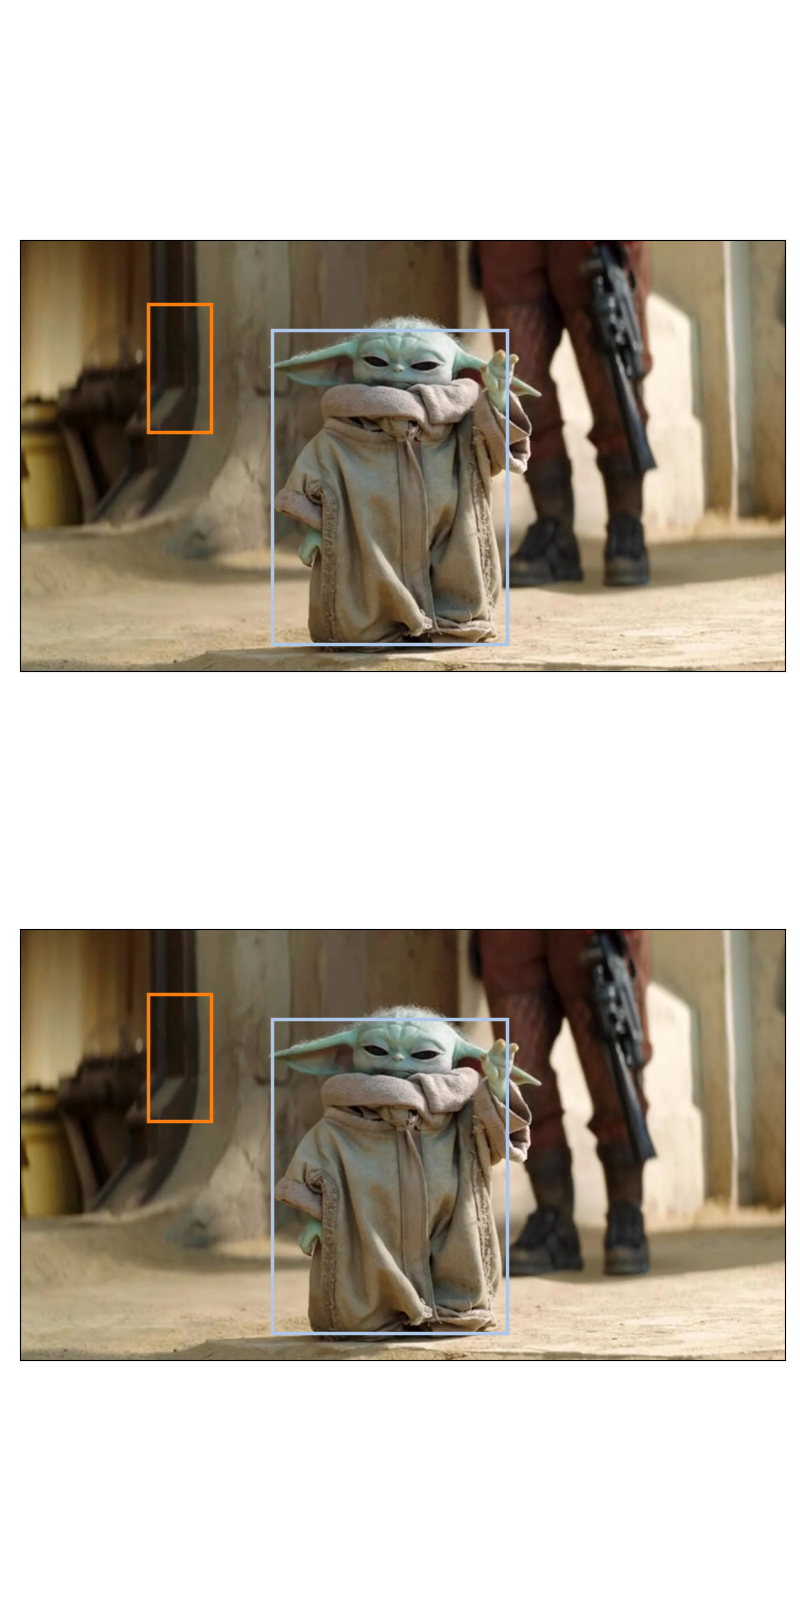

In [51]:
data2.show()

<IPython.core.display.Javascript object>


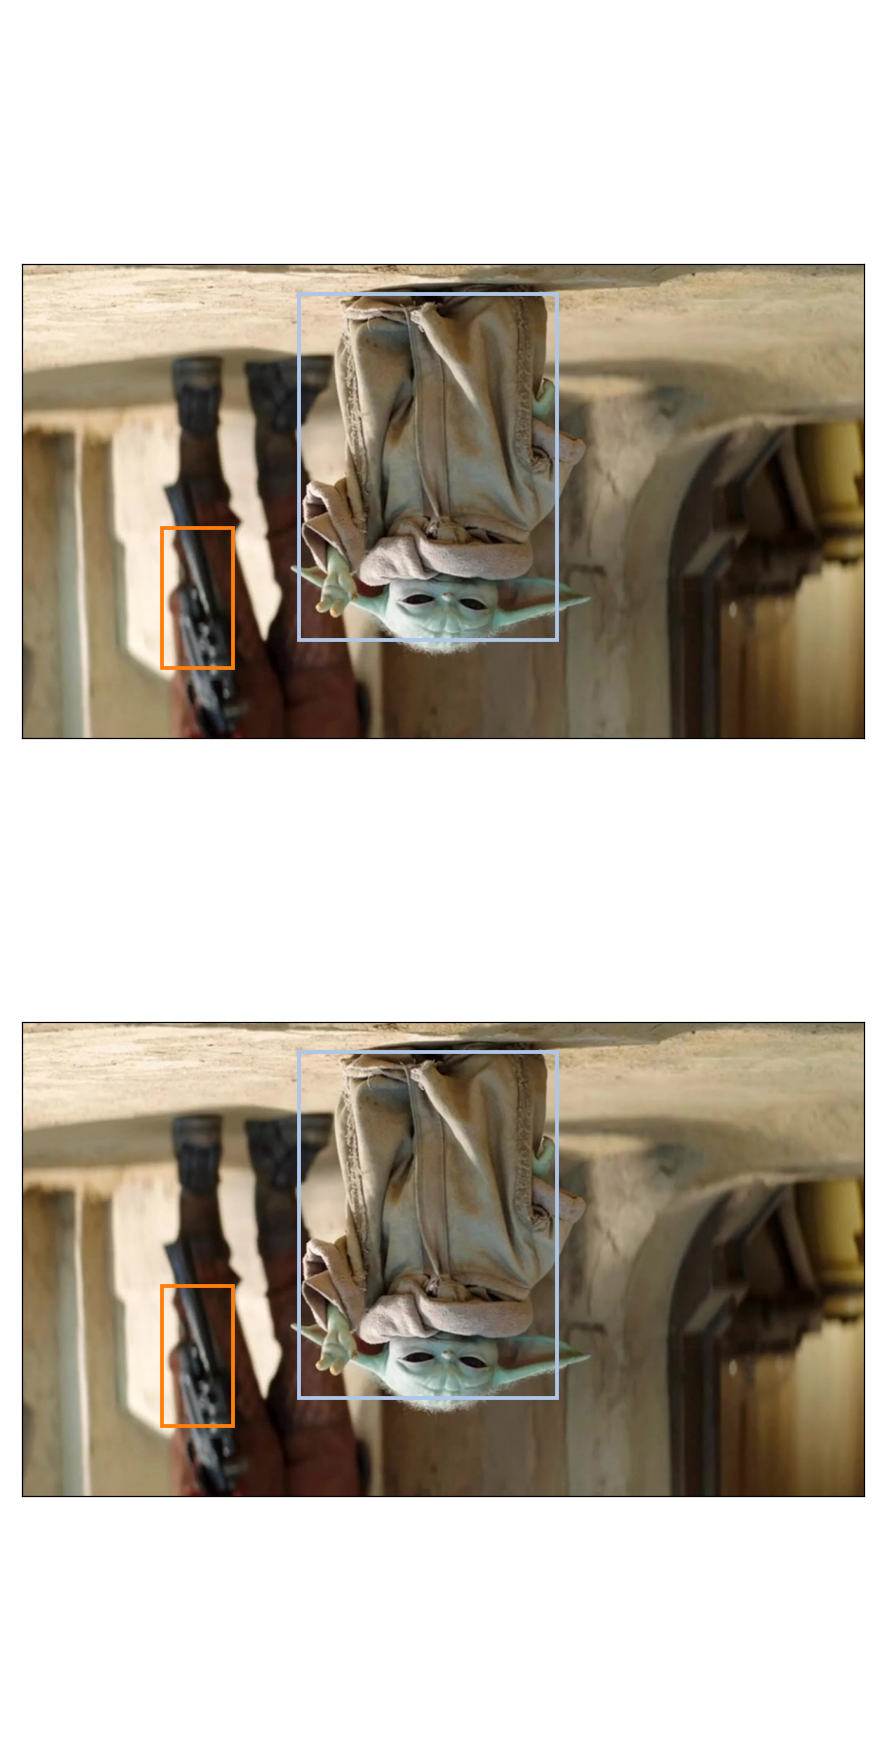

In [13]:
from src.data.transform import Resize, RandomCrop, RandomFlip

rhf = RandomFlip(p=1, direction='vertical')
rhf(data.clone()).show()

In [8]:
print(data.images_sizes)


tensor([[ 675, 1200],
        [ 675, 1200]])


tensor([[ 675, 1200],
        [ 675, 1200]])
tensor([[[395, 140, 763, 633],
         [200, 100, 300, 300]],

        [[395, 140, 763, 633],
         [200, 100, 300, 300]]])
ObjectDetectionData(
    bboxes=Tensor(shape=torch.Size([2, 2, 4]), device=cpu, dtype=torch.float32, is_shared=False),
    image=Tensor(shape=torch.Size([2, 3, 200, 200]), device=cpu, dtype=torch.uint8, is_shared=False),
    images_sizes=Tensor(shape=torch.Size([2, 2]), device=cpu, dtype=torch.int64, is_shared=False),
    labels=Tensor(shape=torch.Size([2, 2, 1]), device=cpu, dtype=torch.int64, is_shared=False),
    batch_size=torch.Size([2]),
    device=cpu,
    is_shared=False)


<IPython.core.display.Javascript object>


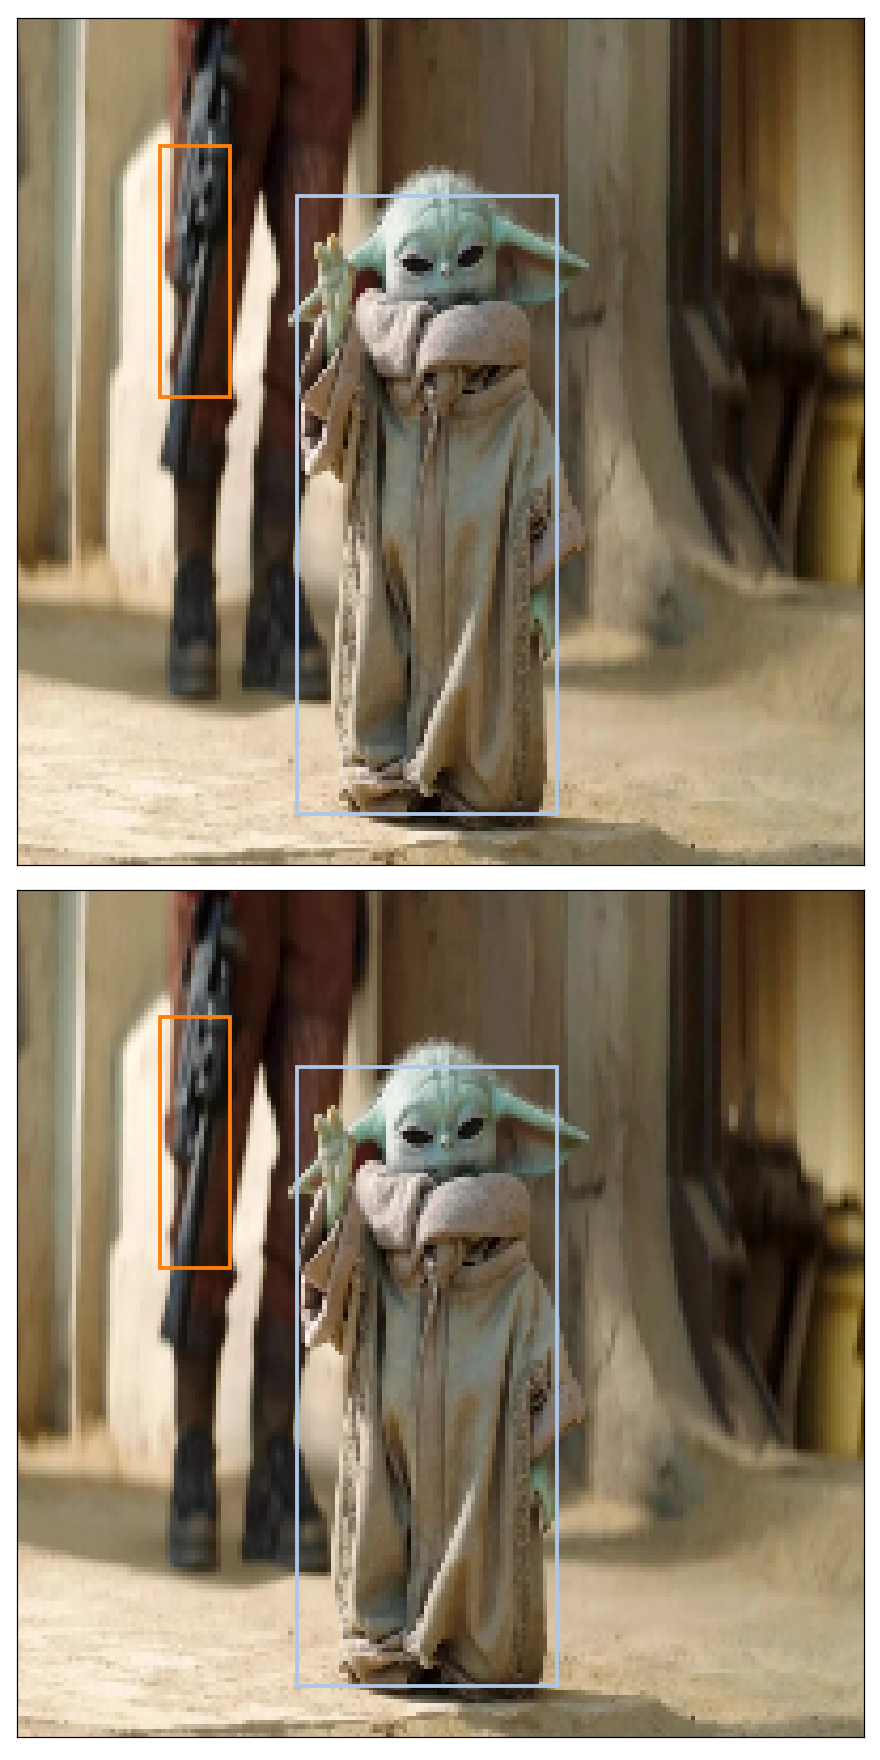

In [15]:
res = Resize((200,200))
print(data.images_sizes)
print(data.bboxes)
data_tr = res(data.clone()) 
print(data_tr)
data_tr.show()

tensor([[ 675, 1200],
        [ 675, 1200]])
tensor([[[395, 140, 763, 633],
         [200, 100, 300, 300]],

        [[395, 140, 763, 633],
         [200, 100, 300, 300]]])
tensor([[[ 65.8333,  67.3333, 127.1667, 149.5000],
         [ 33.3333,  60.6667,  50.0000,  94.0000]],

        [[ 65.8333,  67.3333, 127.1667, 149.5000],
         [ 33.3333,  60.6667,  50.0000,  94.0000]]])


<IPython.core.display.Javascript object>


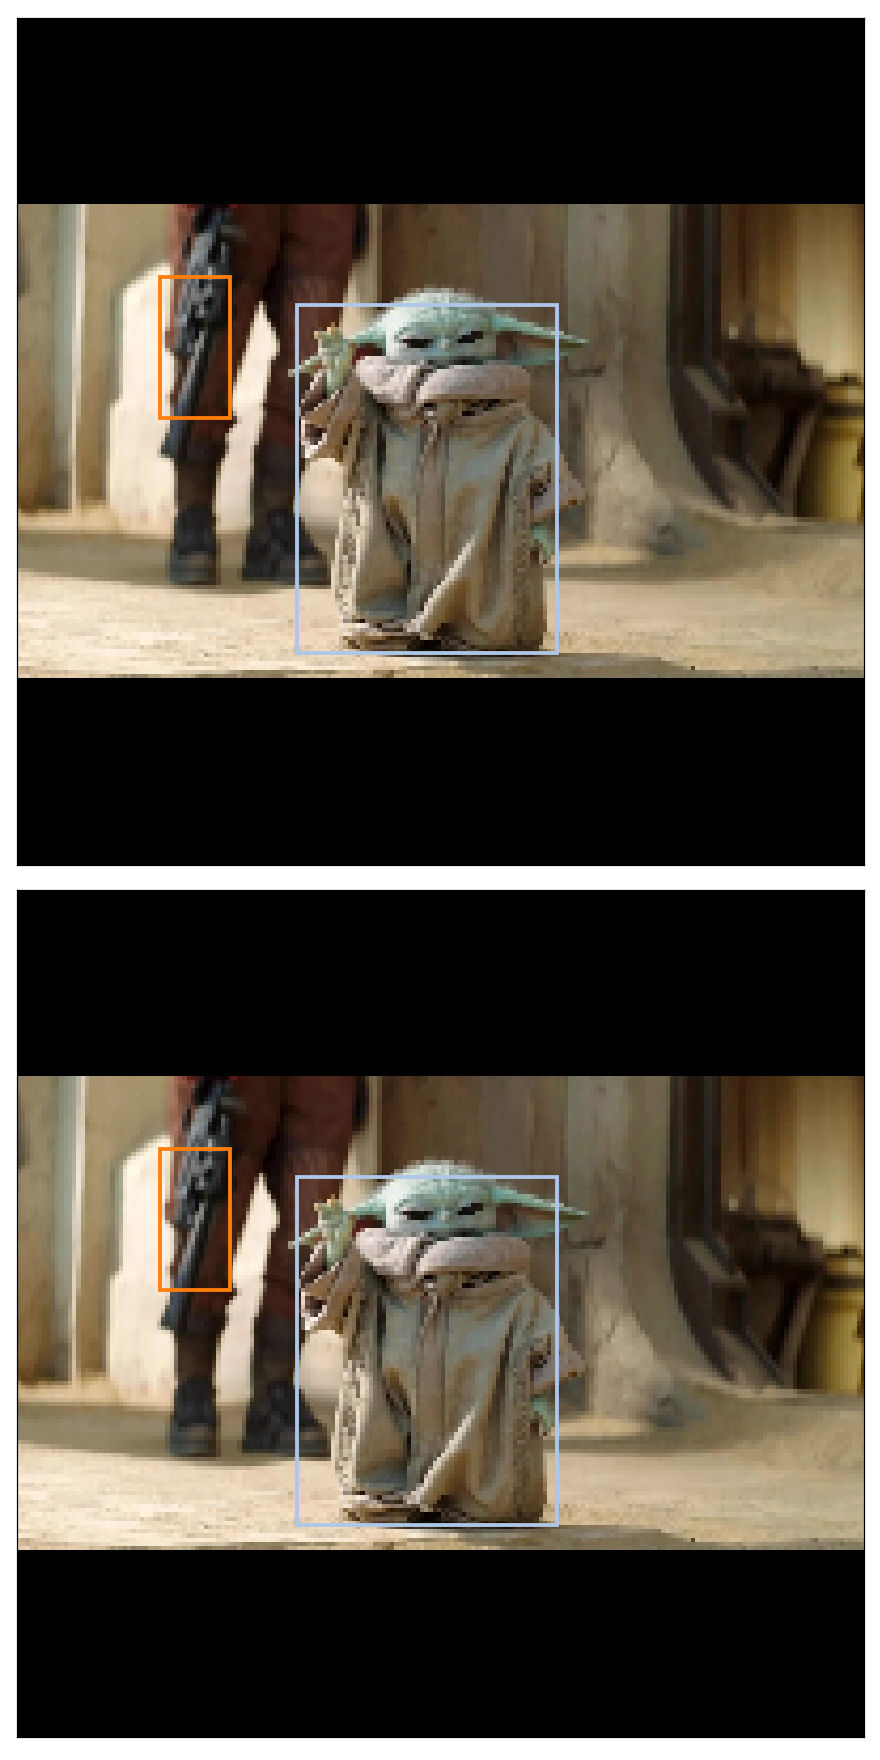

In [29]:
res = Resize((200,200), keep_aspect_ratio=True)
print(data.images_sizes)
print(data.bboxes)
data_tr = res(data.clone()) 
print(data_tr.bboxes)
(data_tr).show()